In [34]:
import numpy as np
import pandas as pd

In [24]:
from cv2 import *

import matplotlib.pyplot as plt

In [25]:
# initialize the camera
cam = VideoCapture(0)   # 0 -> index of camera
s, img = cam.read()
if s:    # frame captured without any errors
    namedWindow("camera")
    imshow("camera",img)
    waitKey(0)
    imwrite("sneakers pic.jpg",img) #save image
    destroyWindow("camera")
    cam.release()
    cv2.destroyAllWindows()

In [26]:
img_array = cv2.imread(os.path.join('sneakers pic.jpg'))

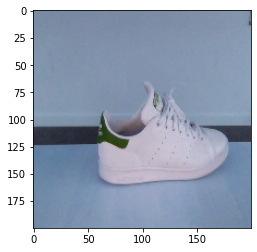

In [27]:
IMG_SIZE = 200

demo_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(demo_array)
plt.show()

In [30]:
demo_array

array([[[119, 141, 163],
        [117, 140, 162],
        [118, 141, 163],
        ...,
        [129, 149, 173],
        [121, 142, 167],
        [ 97, 111, 134]],

       [[124, 140, 163],
        [123, 141, 164],
        [125, 142, 165],
        ...,
        [133, 149, 174],
        [120, 138, 163],
        [101, 113, 138]],

       [[123, 139, 165],
        [119, 138, 163],
        [119, 141, 163],
        ...,
        [126, 144, 168],
        [124, 139, 166],
        [100, 107, 133]],

       ...,

       [[115, 139, 166],
        [114, 138, 165],
        [110, 138, 164],
        ...,
        [111, 133, 163],
        [113, 135, 163],
        [113, 135, 161]],

       [[114, 138, 168],
        [114, 135, 165],
        [109, 137, 164],
        ...,
        [114, 137, 165],
        [108, 132, 160],
        [112, 135, 161]],

       [[113, 135, 167],
        [115, 136, 167],
        [110, 137, 164],
        ...,
        [114, 136, 164],
        [108, 132, 161],
        [109, 133, 159]]

In [67]:
demo_array.shape

(200, 200, 3)

In [29]:
# import predictive model
from tensorflow import keras
new_model = keras.models.load_model('model8300.h5')

In [35]:
new_array = np.array(demo_array)

In [40]:
new_array = new_array.reshape((1, 200, 200, 3))

In [41]:
new_array.shape

(1, 200, 200, 3)

In [44]:
prediction = new_model.predict(new_array)

In [45]:
prediction

array([[0.5757271]], dtype=float32)

In [47]:
retry_array = new_array/255

In [48]:
pred_retry = new_model.predict(retry_array)

In [49]:
pred_retry

array([[0.57481074]], dtype=float32)

In [50]:
retry_array2 = retry_array/255

In [51]:
pred_retry2 = new_model.predict(retry_array2)

In [52]:
pred_retry2

array([[0.62156445]], dtype=float32)

In [53]:
retry_array3 = retry_array2/255

In [54]:
pred_retry3 = new_model.predict(retry_array3)

In [55]:
pred_retry3

array([[0.62679577]], dtype=float32)

In [56]:
retry_array4 = retry_array3/255

In [57]:
pred_retry4 = new_model.predict(retry_array4)

In [58]:
pred_retry4

array([[0.6268157]], dtype=float32)

In [59]:
import webbrowser

In [66]:
if np.round(pred_retry4) == 0:
    webbrowser.open('https://www.zalando.co.uk/men/?q=nike+shoes')
elif np.round(pred_retry4) == 1:
    webbrowser.open('https://www.zalando.co.uk/men/?q=adidas+shoes')